# Problem 1

We first write a function to integrate

$$
\frac{d y }{dx}= \frac{y}{1+x^{2}}
$$

from $x=-20$ to $x=20$ with $y(-20)=1$ using 200 steps. 

0.00011776140522522912


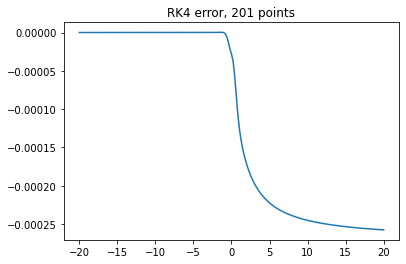

In [7]:
import numpy as np
from matplotlib import pyplot as plt

#solve y'=y/(1+x^2) with RK4


def f(x, y):#y'=y/(1+x^2)
    return y/(1+x**2)


def rk4(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy


npt=201
x=np.linspace(-20,20,npt)
y=np.zeros([2,npt])
y[0,0]=1 #starting conditions

for i in range(npt-1):
    h=x[i+1]-x[i]
    y[:,i+1]=rk4(f,x[i],y[:,i],h)
    

c=1/np.exp(np.arctan(-20))
truth=c*np.exp(np.arctan(x))
print(np.std(truth-y[0,:]))

plt.ion()
plt.plot(x,y[0,:]-truth)
plt.title('RK4 error, ' + repr(npt)+ ' points')
plt.show()

Now we define another solver that takes a step of length $h$, compares that to two steps of length $h / 2$, and uses them to cancel out the leading-order error term from RK4. How many function evaluations per step does this one use? Use this modified stepper to carry out the same ODE solution using the same number of function evaluations as the original. Which is more accurate?


Recalling that for a step-size $h>0$, the Runge Kutta of order 4 method is constructed with:
$$
\begin{aligned}
&y_{n+1}=y_n+\frac{1}{6}\left(k_1+2 k_2+2 k_3+k_4\right) h \\
&x_{n+1}=x_n+h
\end{aligned}
$$
for $n=0,1,2,3, \ldots$ using ${ }^{[3]}$
$$
\begin{aligned}
&k_1=f\left(x_n, y_n\right) \\
&k_2=f\left(x_n+\frac{h}{2}, y_n+h \frac{k_1}{2}\right), \\
&k_3=f\left(x_n+\frac{h}{2}, y_n+h \frac{k_2}{2}\right), \\
&k_4=f\left(x_n+h, y_n+h k_3\right) .
\end{aligned}
$$


With $y_2$ being the approximation obtained using two steps of size $h/2$ and $y_1$ with one step of size $h$,we have:
$$
\begin{aligned}
& {y}_{n+1}=y_1+C h^{ 5}+\mathscr{O}\left(h^{6}\right) \\
& {y}_{n+1}=y_2+2 C\left(\frac{h}{2}\right)^{ 5}+\mathscr{O}\left(h^{6}\right) .
\end{aligned}
$$
So that
$$
\left|y_1-y_2\right|=C h^{ 5}\left(1-\frac{1}{2^4}\right) \Leftrightarrow C=\frac{\left|y_1-y_2\right|}{\left(1-2^{-4}\right) h^{ 5}} .
$$
Substituing the relation  back in the true solution we get
$$
 {y}_{n+1}=y_2+\varepsilon+\mathscr{O}\left(h^{6}\right),
$$
where
$$
\varepsilon=\frac{\left|y_1-y_2\right|}{2^4-1}
$$
can be considered as a convenient indicator of the truncation error. That is, we have improved our estimate to the order $ 5$.
$$
 {y}_{n+1}=y_2+\frac{\left|y_1-y_2\right|}{15}+\mathscr{O}\left(h^6\right) .
$$
This estimate is accurate to fifth order, one order higter than with the original step $h$. However, this method is not efficient. It seems this method, theoretically at least, is more accurate, and it uses 8 function calls (instead of 11 in the classical rk4).

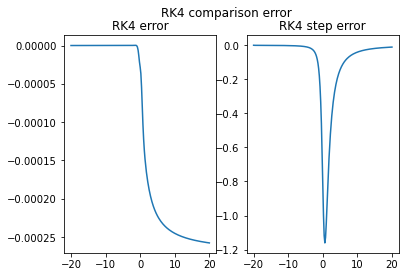

In [21]:
def rk4_stepd(fun, x, y, h):
    #Half step
    k1=fun(x,y)*h
    k2=h*fun(x+h/4,y+k1/4)
    k3=h*fun(x+h/4,y+k2/4)
    k4=h*fun(x+h/2,y+k3/2)
    dy=(k1+2*k2+2*k3+k4)/12
    
    y2=y+2*dy
    y1=rk4(fun,x,y,h)
    
    eps=abs(y2-y1)/15
    
    return y+eps


npt=201
x=np.linspace(-20,20,npt)
y=np.zeros([2,npt])
y_mod=np.zeros([2,npt])

y[0,0]=1#starting conditions
y_mod[0,0]=1

for i in range(npt-1):
    h=x[i+1]-x[i]
    y[:,i+1]=rk4(f,x[i],y[:,i],h)
    y_mod[:,i+1]=rk4_stepd(f,x[i],y[:,i],h)
    
    
    

c=1/np.exp(np.arctan(-20))
truth=c*np.exp(np.arctan(x))
#print(np.std(truth-y[0,:]))

fig, ax = plt.subplots(1, 2)
fig.suptitle('RK4 comparison error')

ax[0].plot(x, y[0,:]-truth)
ax[0].set_title('RK4 error')

ax[1].plot(x,y_mod[0,:]-truth)
ax[1].set_title('RK4 step error')

plt.show()

For some reason, we obtain a bigger error for the improved version. This means that something must have went wrong somewhere. However, I wasn't able to find out what.

The only thing I could think of is how the same step size all over the function could possibly affect the accuracy, since know that if step size is too large, we might shoot off too far in one direction (along the local tangents) and hence potentially miss oscillations or other interesting feature.

Conversely, if the step size is smaller than necessary we might be uselessly increasing -time- complexity and causing a bigger deviation from the true function